### Carregando os dados

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("Social_Network_Ads.csv")

X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Treinando o modelo Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=42)
clf = clf.fit(X_train, y_train)


### Prevendo um valor especifico

In [44]:
idade = 30
salario = 87000

especific_predict = clf.predict(sc.transform([[idade, salario]]))
print(especific_predict)
print(f'A predição para alguem de {idade} anos e salario de {salario} é {"comprador" if especific_predict else "não comprador"}')

[0]
A predição para alguem de 30 anos e salario de 87000 é não comprador


### Prevendo test_split

In [45]:
import numpy as np

y_pred = clf.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 1]]


### Analisando matriz de confusão e acuracia

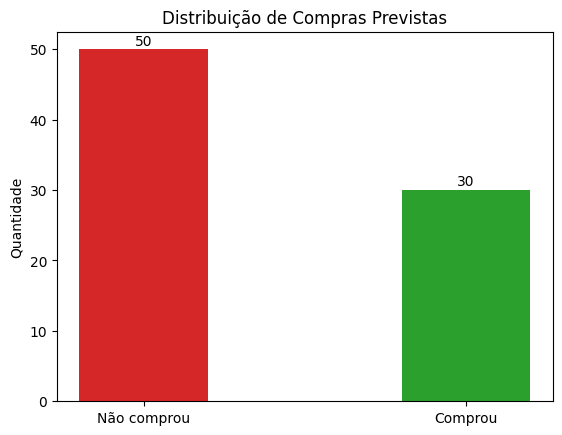

In [50]:
labels = ['Não comprou', 'Comprou']
counts = [np.sum(y_pred == 0), np.sum(y_pred == 1)]

x = np.arange(len(labels))
width = 0.4

fig, ax = plt.subplots()
bars = ax.bar(x, counts, width, color=['#d62728', '#2ca02c'])
ax.bar_label(bars, padding=1)
ax.set_ylabel('Quantidade')
ax.set_title('Distribuição de Compras Previstas')
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()


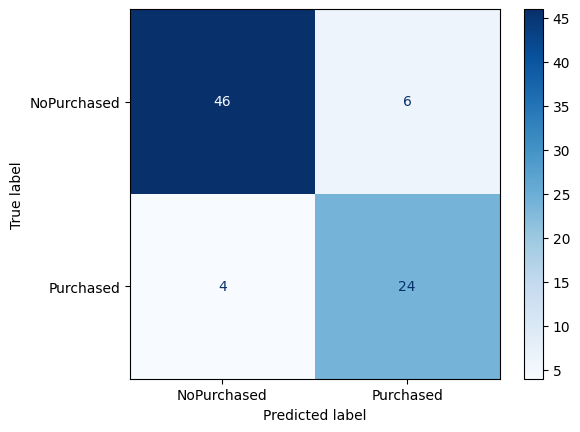

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(cm, display_labels=["NoPurchased", "Purchased"])
disp.plot(cmap="Blues")
plt.show()


In [47]:
acc = accuracy_score(y_test, y_pred)
print(f'Acuracia de {acc} ou {acc*100}%')

Acuracia de 0.875 ou 87.5%


### Visualizando os grafico de classificação nos dados de treino

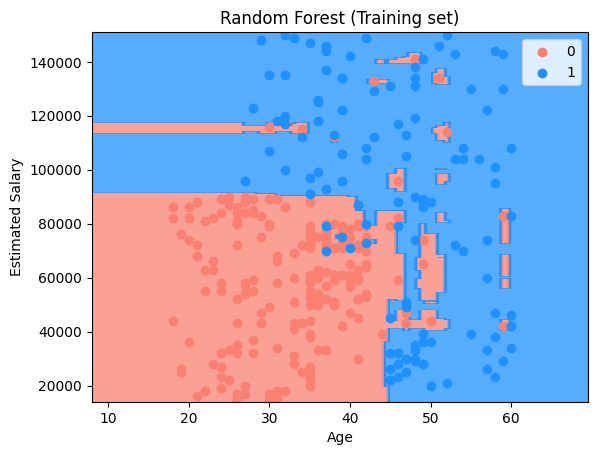

In [48]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('Random Forest (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

### Visualizando os grafico de classificação nos dados de teste

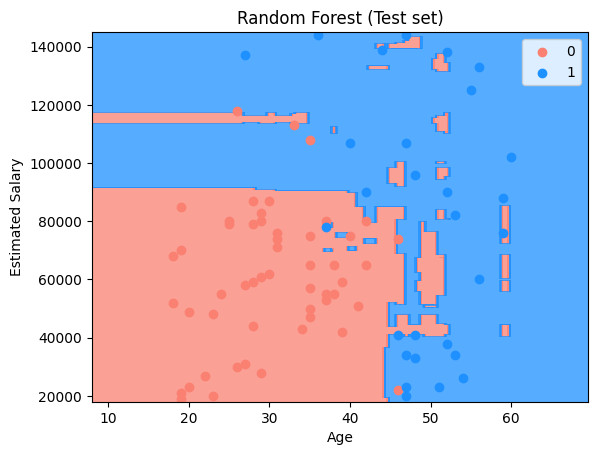

In [49]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 0.5),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 0.5))
plt.contourf(X1, X2, clf.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(['#FA8072', '#1E90FF']))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color = ListedColormap(['#FA8072', '#1E90FF'])(i), label = j)
plt.title('Random Forest (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()